In [1]:
require(data.table)
require(ggplot2)
require(viridis)
require(RColorBrewer)
source("functions/save_and_plot.R")

Loading required package: data.table

Loading required package: ggplot2

Loading required package: viridis

Loading required package: viridisLite

Loading required package: RColorBrewer



In [2]:
pdata = fread("../data/Tier_2_detection_efficiency_per_target_chrX_46plex_eLIT.csv")

In [3]:
set.seed(465456)
pdata[, loci := factor(loci, levels=paste0("X", 1:46))]
pdata[Deconvolution == "Non DW", Deconvolution := "RL"]
pdata[, Deconvolution := factor(Deconvolution, levels=c("RL", "DW"))]
pdata[, nudge_x := runif(.N, -.125, .125)]

In [4]:
require(boot)
set.seed(424654)
mean.fun = function(data, idx) { mean(data[idx]) }
stat_data = pdata[, .(mean=mean(detected), sd=sd(detected), ci=diff(unlist(boot.ci(boot.out=boot(detected, mean.fun, R=1000), type=c("perc"))$percent)[4:5])/2), by=c("loci", "Deconvolution")]

Loading required package: boot



[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"
[1] "All values of t are equal to  1 \n Cannot calculate confidence intervals"


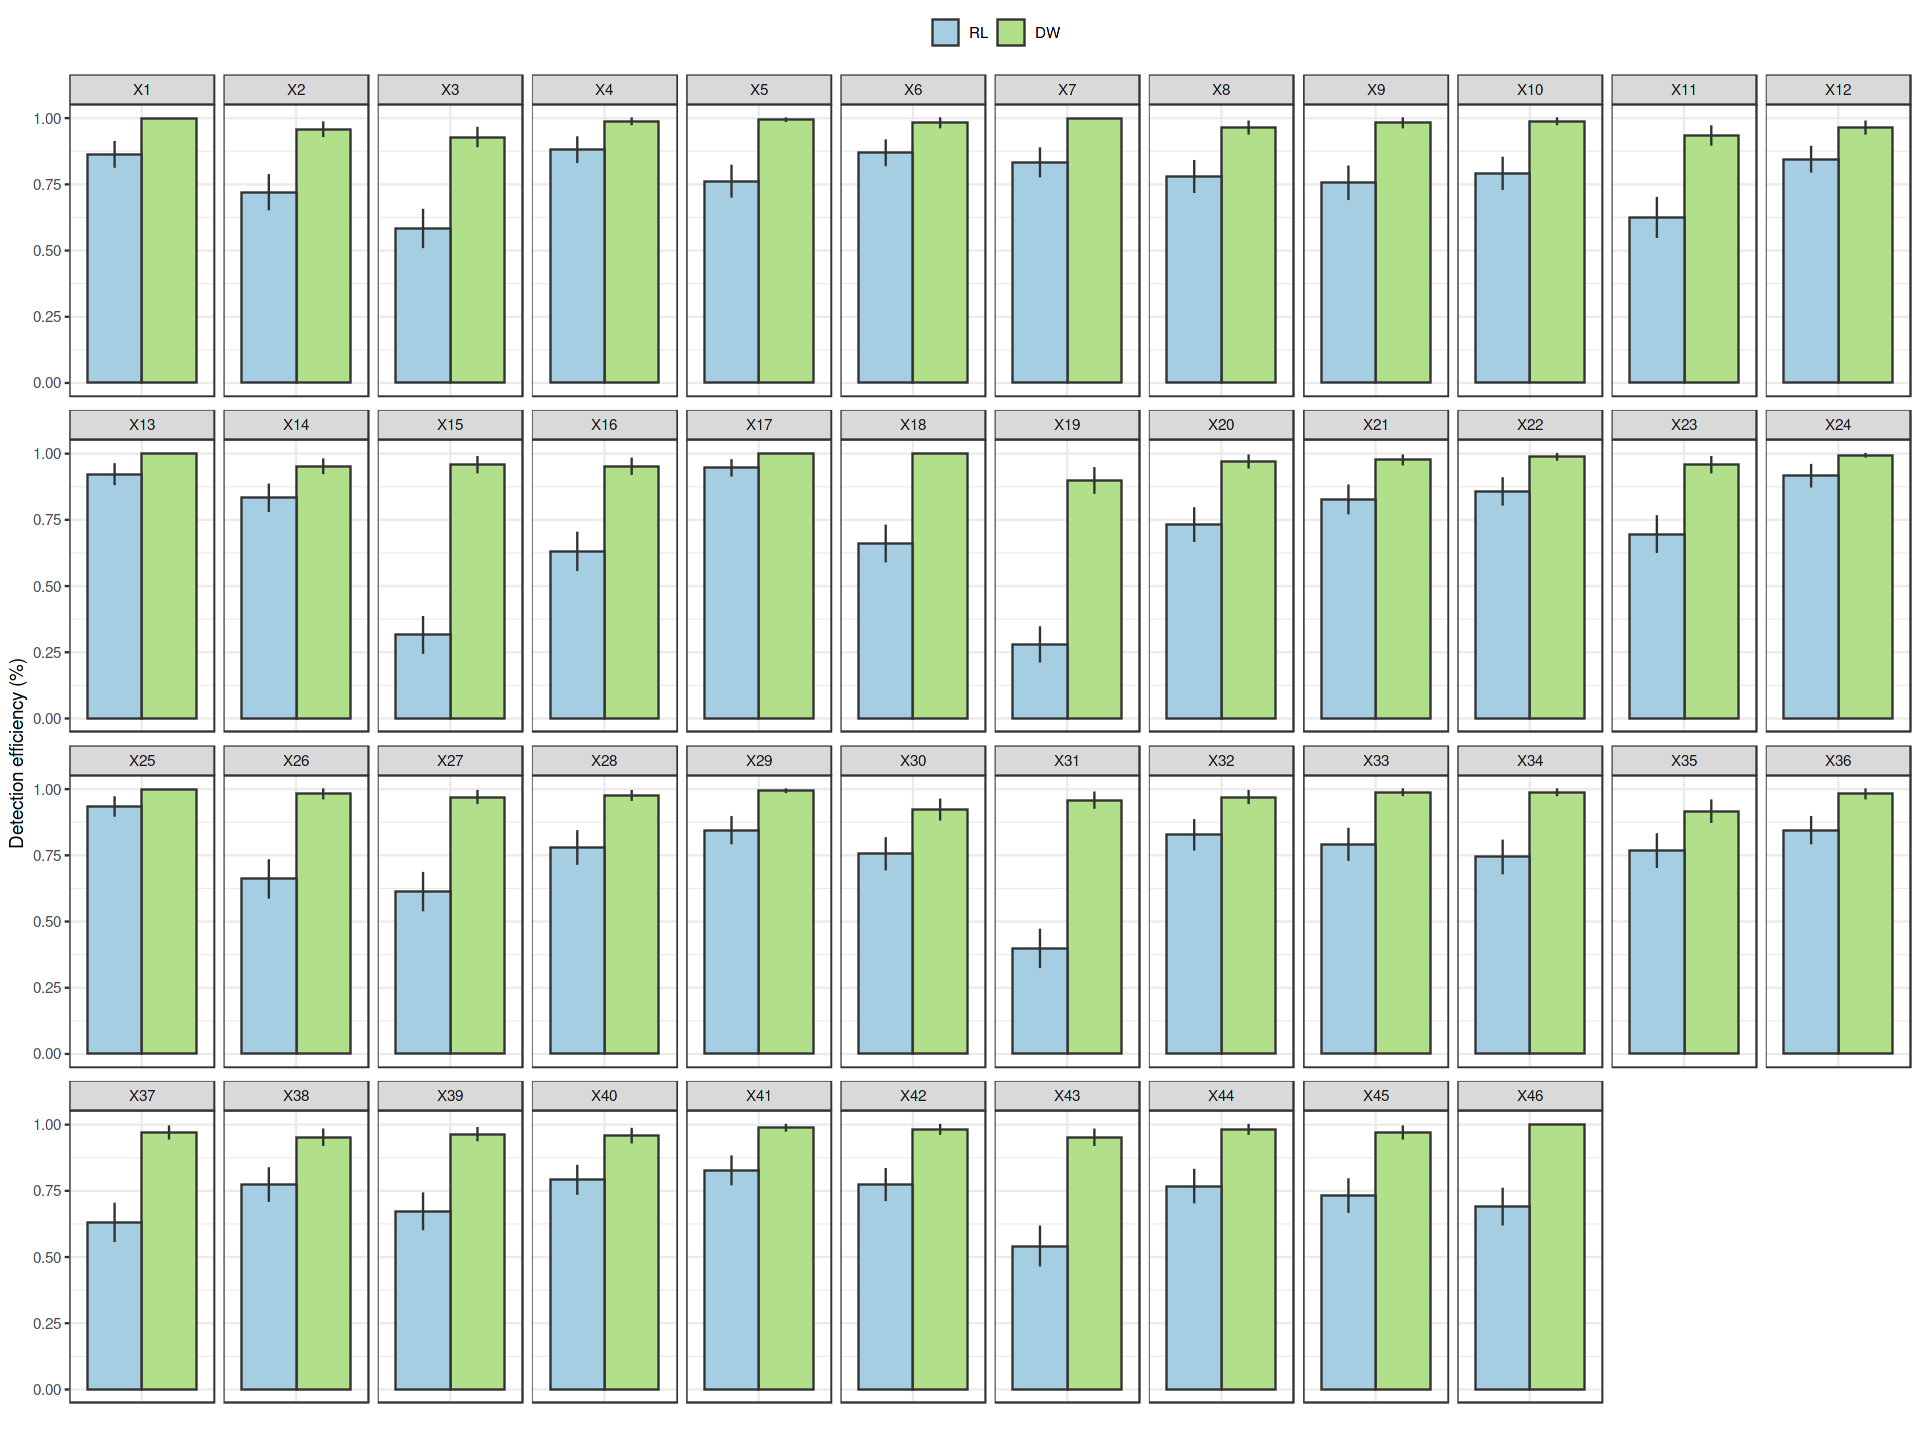

In [5]:
options(repr.plot.width=16, repr.plot.height=12)
palette = brewer.pal(4, "Paired")
p = ggplot(stat_data, aes(x=loci, y=mean, fill=Deconvolution)) +
    geom_col(position="dodge", color="#323232") +
    theme_bw() + scale_fill_manual("", values=palette[c(1,3)]) +
    labs(x="", y="Detection efficiency (%)") +
    geom_errorbar(data=stat_data[Deconvolution == "DW"],
                  aes(x=1+.225, ymax=mean+ci, ymin=mean-ci),
                  color="#323232", width=0, size=.5) +
    geom_errorbar(data=stat_data[Deconvolution == "RL"],
                  aes(x=1-.225, ymax=mean+ci, ymin=mean-ci),
                  color="#323232", width=0, size=.5) +
    facet_wrap(~loci, scales="free_x", nrow=4) +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank(), legend.position="top")
print(p)

In [6]:
#save_and_plot(p, "figures/supp_fig_x5", width=16, height=12, formats=c("png", "jpg", "pdf"))
#saveRDS(p, "figures/supp_fig_x5.rds")

In [7]:
dd = dcast(stat_data, loci~Deconvolution, value.var="mean")
dd[order(RL, decreasing=T), II := .I]
ddm = melt(dd, id.vars=c("loci", "II"))
xlabs = unique(ddm[, .(loci, II)])
setkeyv(xlabs, "loci")
setkeyv(stat_data, "loci")
stat_data2 = xlabs[stat_data]

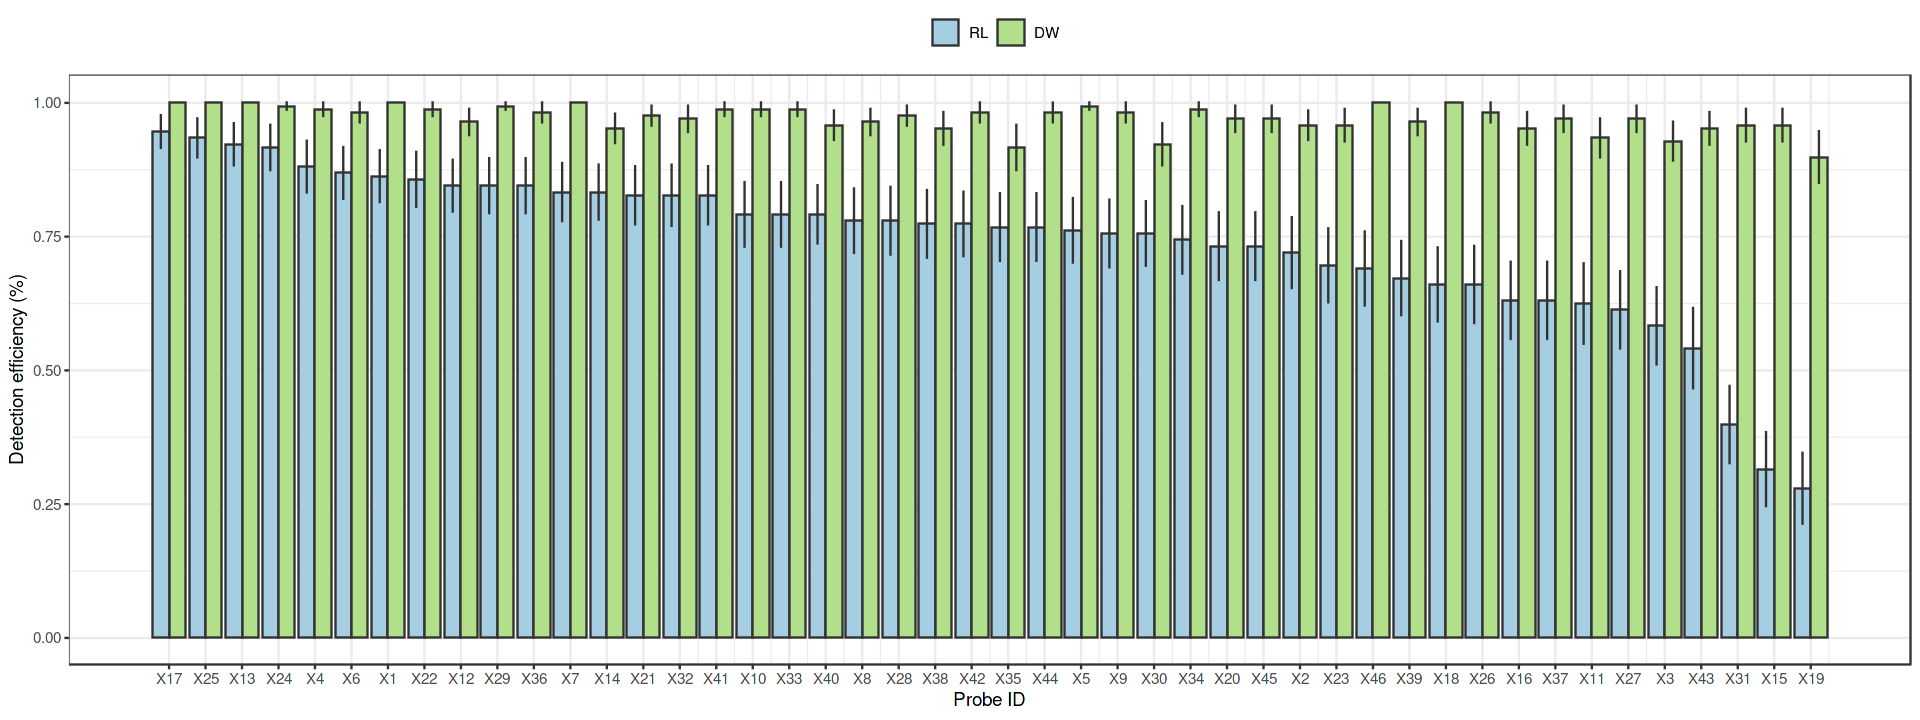

In [8]:
options(repr.plot.width=16, repr.plot.height=6)
palette = brewer.pal(4, "Paired")
p = ggplot(ddm, aes(x=II, y=value)) +
    geom_col(aes(fill=variable), position="dodge", color="#323232") +
    theme_bw() + scale_fill_manual("", values=palette[c(1,3)]) +
    labs(x="Probe ID", y="Detection efficiency (%)") +
    geom_errorbar(data=stat_data2[Deconvolution == "DW"],
                  aes(x=II+.225, y=mean, ymax=mean+ci, ymin=mean-ci),
                  color="#323232", width=0, size=.5) +
    geom_errorbar(data=stat_data2[Deconvolution == "RL"],
                  aes(x=II-.225, y=mean, ymax=mean+ci, ymin=mean-ci),
                  color="#323232", width=0, size=.5) +
    theme(legend.position="top") +
    scale_x_continuous(breaks=xlabs$II, labels=xlabs$loci)
print(p)

In [9]:
save_and_plot(p, "figures/supp_fig_x5_v2", width=16, height=6, formats=c("png", "jpg", "pdf"))
saveRDS(p, "figures/supp_fig_x5_v2.rds")